## Some context on the TfidVectorizer and text handing in sklearn

* To represent a review to a neural network, each word has to be expressed as a number. 

* Each word in the review corpus is assigned a unique number. Assume the total number of unique words is feature_count. 

* Each review can then be represented as a vector of length feature_count. 

* Entries in this vector can be either 0 or 1, if the word is present in this review or absent respectively. 

* A more advanced approach will replace the binary numbers above with ratios that emphaise how rare ( and hence meanigful and representative ) the word is across all reviews. For example, a word like "product" will have little use for the neural network in determing whetehr this is a rating-1 or rating-5 review, as this particular word occurs in most reviews, both positive and negative ones. 

* Here we limit the number of feature_count to 40,000 to cut down the training time. 

more info available from 
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [1]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import itertools

# reading the data
df = pd.read_csv('sp500_27270.csv')

# most correlated with the S&P index value
corr = df.corr()
x = corr['SP500'][((corr.SP500>=0.95)| (corr.SP500<=-0.95))]
print(x)

SP500    1.000000
ACN      0.960921
ATVI     0.954096
ADBE     0.958978
AET      0.970711
AFL      0.953027
A        0.953989
ALL      0.976700
AMT      0.962243
APH      0.988361
ADI      0.976134
ANTM     0.970581
AON      0.966679
AAPL     0.969525
AJG      0.970304
ADSK     0.965185
ADP      0.969131
BK       0.959471
BAX      0.965961
BBT      0.951405
BDX      0.971963
BRK.B    0.983833
BLK      0.966159
CDNS     0.973219
CTAS     0.975000
CSCO     0.969696
CTXS     0.956092
CME      0.976921
CSX      0.952020
ECL      0.964308
           ...   
MMC      0.964431
MA       0.956718
MSFT     0.973043
NEE      0.962797
NTRS     0.976346
PGR      0.960835
PLD      0.953950
RJF      0.968748
RTN      0.958189
RSG      0.955212
COL      0.960783
ROP      0.981822
SHW      0.971001
SPGI     0.980989
SYK      0.974447
STI      0.975756
SNPS     0.980479
TEL      0.965136
TXN      0.982295
TMO      0.974173
TMK      0.966241
TSS      0.954631
TDG      0.950495
UNH      0.981647
V        0

In [2]:
# Task 1
# input containing all the correlated
x = np.array(df[['ACN', 'ATVI', 'ADBE', 'AET', 'AFL', 'A', 'ALL', 'AMT', 'APH', 'ADI', 'ANTM', 'AON', 'AAPL', 'AJG', 'ADSK', 'ADP', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BLK', 'CDNS', 'CTAS', 'CSCO', 'CTXS', 'CME', 'CSX', 'ECL', 'EXPD', 'FDX', 'HRS', 'IQV', 'JBHT', 'JPM', 'KLAC', 'LLL', 'LH', 'LRCX', 'LMT', 'MAR', 'MMC', 'MA', 'MSFT', 'NEE', 'NTRS', 'PGR', 'PLD', 'RJF', 'RTN', 'RSG', 'COL', 'ROP', 'SHW', 'SPGI', 'SYK', 'STI', 'SNPS', 'TEL', 'TXN', 'TMO', 'TMK', 'TSS', 'TDG', 'UNH', 'V', 'WM', 'WAT', 'XYL', 'YUM', 'ZTS']])
y = np.array(df['SP500'])

# split the data into 80% training and 20% testing
# early stop 20% for the validation
trainingPortion = 0.8
noDataPoints = x.shape[0]

tmp = np.arange(noDataPoints)
np.random.shuffle(tmp)

x = preprocessing.scale(x)
y = preprocessing.scale(y)

X_train = x[tmp[:int(trainingPortion * noDataPoints)]]
Y_train = y[tmp[:int(trainingPortion * noDataPoints)]]
X_test = x[tmp[int(trainingPortion * noDataPoints):]]
Y_test = y[tmp[int(trainingPortion * noDataPoints):]]

In [1]:
# The regularization technique used to avoid overfitting is early stopping
# We used early stopping for the algorithm to stop whenever the validation mean squared error does not change significantly.
# If the mean squared error seldom changes for a certain number of epochs, the algorithm stops and produces the result of the test data.

# Cross validation was not used as it takes more time, so it will require small datasets

# scoring metric
# MSE will penalize the error more significantly
# Accuracy metric could not be used because the data is continious

np.random.seed(5)
#predictor with 'adam' optimizer
prediktor1 = MLPRegressor(hidden_layer_sizes = (70,),solver='adam',activation='tanh',early_stopping=True,validation_fraction=0.2,learning_rate_init = 0.001)
prediktor1.fit(X_train, Y_train)

#scoring metric
predicted_targets = prediktor1.predict(X_test)
error = metrics.mean_squared_error(predicted_targets,Y_test)

error

NameError: name 'np' is not defined

In [17]:
np.random.seed(5)
#predictor with 'sgd' optimizer
prediktor2 = MLPRegressor(hidden_layer_sizes = (70,),solver='sgd',activation='tanh',early_stopping=True,validation_fraction=0.2,learning_rate_init = 0.01)
prediktor2.fit(X_train, Y_train)

#scoring metric
predicted_targets1 = prediktor2.predict(X_test)
error = metrics.mean_squared_error(predicted_targets1,Y_test)

error
# if the learning rate is too small the model can be slow
# if the learning rate is too large the model can miss the local minimun

# sgd optimizer performs better

0.006263761807238792

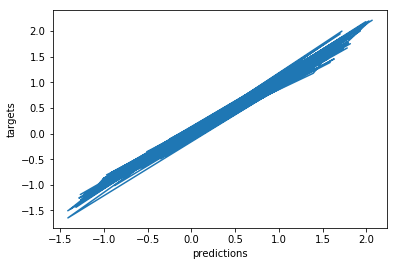

In [6]:
# plot
plt.xlabel('predictions')
plt.ylabel('targets')
plt.plot(predicted_targets1,Y_test)

In [21]:
# Task 2
x1 = np.array(df[['SP500','ACN', 'ATVI', 'ADBE', 'AET']])
y1 = np.array(df[['AFL','A', 'ALL', 'AMT']])

trainingPortion = 0.8
noDataPoints = x1.shape[0]

tmp = np.arange(noDataPoints)
np.random.shuffle(tmp)

x1 = preprocessing.scale(x1)
y1 = preprocessing.scale(y1)

X_train = x1[tmp[:int(trainingPortion * noDataPoints)]]
Y_train = y1[tmp[:int(trainingPortion * noDataPoints)]]
X_test = x1[tmp[int(trainingPortion * noDataPoints):]]
Y_test = y1[tmp[int(trainingPortion * noDataPoints):]]

In [22]:
df1 = pd.DataFrame(columns=['t-4', 't-3', 't-2','t-1','t','t+1'],index = range(500))
df2 = df['ACN']
for i in range(252):
    x1 = np.array(df2)
    arr1 = x1[0:6]
    df0 = pd.DataFrame(arr1.reshape(-1, 6),columns=['t-4', 't-3', 't-2','t-1','t','t+1'])
    df1 = pd.concat([df1,df0])
    df2 = df2.shift(periods=-1,axis=0)
df1 = df1.dropna()
df1

,t-4,t-3,t-2,t-1,t,t+1
0,64.8930,63.7629,63.8719,64.7626,66.0803,66.0349
0,63.7629,63.8719,64.7626,66.0803,66.0349,65.0716
0,63.8719,64.7626,66.0803,66.0349,65.0716,65.8259
0,64.7626,66.0803,66.0349,65.0716,65.8259,66.2076
0,66.0803,66.0349,65.0716,65.8259,66.2076,66.2348
0,66.0349,65.0716,65.8259,66.2076,66.2348,66.8256
0,65.0716,65.8259,66.2076,66.2348,66.8256,67.2073
0,65.8259,66.2076,66.2348,66.8256,67.2073,67.0528
0,66.2076,66.2348,66.8256,67.2073,67.0528,66.7983
0,66.2348,66.8256,67.2073,67.0528,66.7983,66.8983


In [25]:
# input
x1 = np.array(df1[['t-4','t-3', 't-2', 't-1', 't']])
# output
y1 = np.array(df1[['t+1']])

# 80% training 20% testing
trainingPortion = 0.8
noDataPoints = x1.shape[0]

tmp = np.arange(noDataPoints)
np.random.shuffle(tmp)

#x1 = preprocessing.scale(x1)
#y1 = preprocessing.scale(y1)

X_train = x1[tmp[:int(trainingPortion * noDataPoints)]]
Y_train = y1[tmp[:int(trainingPortion * noDataPoints)]]
X_test = x1[tmp[int(trainingPortion * noDataPoints):]]
Y_test = y1[tmp[int(trainingPortion * noDataPoints):]]

In [29]:
np.random.seed(5)
#predictor with 'sgd' optimizer 
prediktor3 = MLPRegressor(hidden_layer_sizes = (60,),solver='adam',activation='relu',early_stopping=True,validation_fraction=0.2,learning_rate_init = 0.001)
prediktor3.fit(X_train, Y_train)

#scoring metric mean squared error
predicted_targets1 = prediktor3.predict(X_test)
error = metrics.mean_squared_error(predicted_targets1,Y_test)

error

# the predicted values are similar to the test values
print(predicted_targets1[:3])
print(Y_test[:3])

[73.52171923 68.21791789 75.22178918]
[[70.6733]
 [70.3518]
 [75.8047]]


Z:\PFz\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
np.random.seed(5)

param_grid = {'hidden_layer_sizes' : [(40,), (10,), (20,), (30,),(50,),(60,),(70,),(80,),(90,),(100,)],'solver':['sgd','adam'],'activation' : ['identity', 'logistic', 'tanh', 'relu'],'learning_rate_init':[0.1,0.01,0.001,0.0001]}

gs = GridSearchCV(prediktor3, param_grid=param_grid)
gs.fit(X_train, Y_train)
gs.best_params_

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\metrics\regression.py:538: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\metrics\regression.py:538: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
D:\Program Files (x86)\anacond

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\metrics\regression.py:538: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\metrics\regression.py:538: RuntimeWarning: overflow encountered in square
  numerator = (weight 

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passe

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum i

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passe

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passe

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWar

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWar

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passe

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passe

{'activation': 'relu',
 'hidden_layer_sizes': (60,),
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [35]:
# Task 3
df = pd.read_json('Digital_Music_5.json', lines=True)

In [36]:
# getting 2500 from each rating and concatinating
reviews1 = df.loc[df['overall'] == 1]
reviews2 = df.loc[df['overall'] == 2]
reviews3 = df.loc[df['overall'] == 3]
reviews4 = df.loc[df['overall'] == 4]
reviews5 = df.loc[df['overall'] == 5]
reviews1 = reviews1[:2500]
reviews2 = reviews2[:2500]
reviews3 = reviews3[:2500]
reviews4 = reviews4[:2500]
reviews5 = reviews5[:2500]
frames = [reviews1, reviews2, reviews3, reviews4, reviews5]
df = pd.concat(frames)
df.shape[0]

12500

In [37]:
x = np.array(df['reviewText'])
y = np.array(df['overall'])

# 80% training , 20% testubg
trainingPortion = 0.8
noDataPoints = x.shape[0]

tmp = np.arange(noDataPoints)
np.random.shuffle(tmp)

X_train = x[tmp[:int(trainingPortion * noDataPoints)]]
Y_train = y[tmp[:int(trainingPortion * noDataPoints)]]
X_test = x[tmp[int(trainingPortion * noDataPoints):]]
Y_test = y[tmp[int(trainingPortion * noDataPoints):]]

tfidf_vectorizer = TfidfVectorizer(max_features=40000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

print(X_train_transformed)

  (0, 38805)	0.027800095338176643
  (0, 30448)	0.10794984013307361
  (0, 26041)	0.22593488258507705
  (0, 36303)	0.23251774676705098
  (0, 33766)	0.08446190907598121
  (0, 2969)	0.04470830277378288
  (0, 39993)	0.10090956263971904
  (0, 35836)	0.044928115649278
  (0, 23744)	0.0546645548632538
  (0, 15755)	0.12431320969042108
  (0, 22828)	0.11525944312933059
  (0, 14718)	0.07288538585610009
  (0, 29179)	0.1427832991799639
  (0, 3757)	0.1844714424976635
  (0, 38955)	0.033385985098093374
  (0, 16453)	0.06863483486068706
  (0, 35691)	0.031097940964557355
  (0, 16641)	0.023730351911506548
  (0, 23613)	0.05777947549565738
  (0, 35361)	0.09083293003488581
  (0, 22201)	0.12607129754291793
  (0, 35058)	0.13893587712046296
  (0, 25733)	0.07662895382387615
  (0, 4333)	0.08585346561526928
  (0, 14215)	0.09636004185969933
  :	:
  (9999, 15305)	0.08669603139934377
  (9999, 36438)	0.08561489583490028
  (9999, 21386)	0.07169555433191249
  (9999, 9196)	0.07827679551056071
  (9999, 35396)	0.074628416879

In [32]:
# the optimal classifier with two hidden layers
np.random.seed(5)
prediktor4= MLPClassifier(hidden_layer_sizes = (512,128),solver='adam',activation='identity',early_stopping=True,validation_fraction=0.2,learning_rate_init = 0.001,verbose = True)
prediktor4.fit(X_train_transformed, Y_train)

#scoring metric is accuracy as it provides comprehensive evaluation of the model
predicted_targets2 = prediktor4.predict(X_test_transformed)
accuracy = metrics.accuracy_score(predicted_targets2,Y_test)

accuracy

NameError: name 'X_train_transformed' is not defined

In [29]:
np.random.seed(5)

param_grid = {'hidden_layer_sizes' : [(128,), (512,128), (1024,512,128)],'solver':['sgd','adam'],'activation' : ['identity', 'logistic', 'tanh', 'relu'],'learning_rate_init':[0.1,0.01,0.001,0.0001]}

gs = GridSearchCV(prediktor4, param_grid=param_grid)
gs.fit(X_train_transformed, Y_train)
gs.best_params_

Iteration 1, loss = 1.60130705
Validation score: 0.257314
Iteration 2, loss = 1.55424239
Validation score: 0.408852
Iteration 3, loss = 1.48218835
Validation score: 0.426107
Iteration 4, loss = 1.38425643
Validation score: 0.437359
Iteration 5, loss = 1.28064269
Validation score: 0.498875
Iteration 6, loss = 1.17381986
Validation score: 0.498875
Iteration 7, loss = 1.07324855
Validation score: 0.528132
Iteration 8, loss = 0.98557197
Validation score: 0.538635
Iteration 9, loss = 0.90570425
Validation score: 0.553638
Iteration 10, loss = 0.83545961
Validation score: 0.553638
Iteration 11, loss = 0.76796465
Validation score: 0.572393
Iteration 12, loss = 0.70738946
Validation score: 0.574644
Iteration 13, loss = 0.64840011
Validation score: 0.580645
Iteration 14, loss = 0.59149429
Validation score: 0.570893
Iteration 15, loss = 0.54222311
Validation score: 0.579145
Iteration 16, loss = 0.49381614
Validation score: 0.577644
Validation score did not improve more than tol=0.000100 for two c

Iteration 9, loss = 1.56531684
Validation score: 0.376312
Iteration 10, loss = 1.55899727
Validation score: 0.384558
Iteration 11, loss = 1.55242284
Validation score: 0.386057
Iteration 12, loss = 1.54548816
Validation score: 0.383058
Iteration 13, loss = 1.53813474
Validation score: 0.363568
Iteration 14, loss = 1.53066957
Validation score: 0.392804
Iteration 15, loss = 1.52237917
Validation score: 0.394303
Iteration 16, loss = 1.51415070
Validation score: 0.392804
Iteration 17, loss = 1.50528341
Validation score: 0.402549
Iteration 18, loss = 1.49610198
Validation score: 0.405547
Iteration 19, loss = 1.48654885
Validation score: 0.417541
Iteration 20, loss = 1.47684338
Validation score: 0.414543
Iteration 21, loss = 1.46663154
Validation score: 0.410045
Iteration 22, loss = 1.45627553
Validation score: 0.422789
Iteration 23, loss = 1.44576394
Validation score: 0.426537
Iteration 24, loss = 1.43512588
Validation score: 0.427286
Iteration 25, loss = 1.42444994
Validation score: 0.42728

Iteration 1, loss = 1.54345543
Validation score: 0.554723
Iteration 2, loss = 1.26041183
Validation score: 0.587706
Iteration 3, loss = 0.97363917
Validation score: 0.592204
Iteration 4, loss = 0.72489191
Validation score: 0.618441
Iteration 5, loss = 0.53106788
Validation score: 0.616942
Iteration 6, loss = 0.38662445
Validation score: 0.613943
Iteration 7, loss = 0.28314505
Validation score: 0.614693
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61907810
Validation score: 0.212303
Iteration 2, loss = 1.61869924
Validation score: 0.212303
Iteration 3, loss = 1.61830103
Validation score: 0.212303
Iteration 4, loss = 1.61791349
Validation score: 0.212303
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61474246
Validation score: 0.198651
Iteration 2, loss = 1.61453131
Validation score: 0.198651
Iteration 3, loss = 1.61431321
Validation score: 0.198651


Iteration 5, loss = 1.88052600
Validation score: 0.538635
Iteration 6, loss = 1.73390791
Validation score: 0.547637
Iteration 7, loss = 1.56133088
Validation score: 0.555889
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 13.24031528
Validation score: 0.378561
Iteration 2, loss = 7.23433140
Validation score: 0.515742
Iteration 3, loss = 3.47067530
Validation score: 0.526987
Iteration 4, loss = 2.14873251
Validation score: 0.519490
Iteration 5, loss = 1.63242380
Validation score: 0.535982
Iteration 6, loss = 1.56376828
Validation score: 0.529235
Iteration 7, loss = 1.41984340
Validation score: 0.537481
Iteration 8, loss = 1.34440920
Validation score: 0.531484
Iteration 9, loss = 1.27255923
Validation score: 0.529985
Iteration 10, loss = 1.22148199
Validation score: 0.534483
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 13.64985773
Validation score: 0.4265

Iteration 13, loss = 1.60034966
Validation score: 0.331334
Iteration 14, loss = 1.59954672
Validation score: 0.356072
Iteration 15, loss = 1.59871451
Validation score: 0.365817
Iteration 16, loss = 1.59794914
Validation score: 0.368816
Iteration 17, loss = 1.59711218
Validation score: 0.359820
Iteration 18, loss = 1.59633994
Validation score: 0.395052
Iteration 19, loss = 1.59555467
Validation score: 0.367316
Iteration 20, loss = 1.59467013
Validation score: 0.385307
Iteration 21, loss = 1.59385710
Validation score: 0.400300
Iteration 22, loss = 1.59303219
Validation score: 0.419790
Iteration 23, loss = 1.59222180
Validation score: 0.389805
Iteration 24, loss = 1.59143262
Validation score: 0.392054
Iteration 25, loss = 1.59054185
Validation score: 0.404798
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61974373
Validation score: 0.223388
Iteration 2, loss = 1.61365010
Validation score: 0.224138
Iteration 3, loss = 1.6

Iteration 4, loss = 1.50500499
Validation score: 0.425787
Iteration 5, loss = 1.56758354
Validation score: 0.429535
Iteration 6, loss = 1.19618875
Validation score: 0.577961
Iteration 7, loss = 3.11310255
Validation score: 0.266117
Iteration 8, loss = nan
Validation score: 0.215142
Iteration 9, loss = nan
Validation score: 0.215142
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 17.13264967
Validation score: 0.258815
Iteration 2, loss = 16.58902421
Validation score: 0.352588
Iteration 3, loss = 10.80517214
Validation score: 0.476369
Iteration 4, loss = 6.23611401
Validation score: 0.513128
Iteration 5, loss = 4.51168260
Validation score: 0.503376
Iteration 6, loss = 3.71953195
Validation score: 0.516129
Iteration 7, loss = 3.31469260
Validation score: 0.500375
Iteration 8, loss = 3.10740890
Validation score: 0.504126
Iteration 9, loss = 3.01152916
Validation score: 0.515379
Validation score did not improve more than tol=

Iteration 12, loss = 1.60008109
Validation score: 0.294824
Iteration 13, loss = 1.59915447
Validation score: 0.337584
Iteration 14, loss = 1.59818722
Validation score: 0.320330
Iteration 15, loss = 1.59732554
Validation score: 0.337584
Iteration 16, loss = 1.59635312
Validation score: 0.354839
Iteration 17, loss = 1.59547910
Validation score: 0.339835
Iteration 18, loss = 1.59448722
Validation score: 0.369092
Iteration 19, loss = 1.59348835
Validation score: 0.360840
Iteration 20, loss = 1.59249456
Validation score: 0.357839
Iteration 21, loss = 1.59156029
Validation score: 0.382596
Iteration 22, loss = 1.59055430
Validation score: 0.354839
Iteration 23, loss = 1.58952135
Validation score: 0.357839
Iteration 24, loss = 1.58844710
Validation score: 0.394599
Iteration 25, loss = 1.58745282
Validation score: 0.387847
Iteration 26, loss = 1.58629293
Validation score: 0.404351
Iteration 27, loss = 1.58528132
Validation score: 0.396849
Iteration 28, loss = 1.58415892
Validation score: 0.4103

Iteration 5, loss = 0.14677095
Validation score: 0.567142
Iteration 6, loss = 0.09577821
Validation score: 0.582146
Iteration 7, loss = 0.07328104
Validation score: 0.583646
Iteration 8, loss = 0.05978664
Validation score: 0.582146
Iteration 9, loss = 0.05088064
Validation score: 0.585146
Iteration 10, loss = 0.04428443
Validation score: 0.586647
Iteration 11, loss = 0.03954072
Validation score: 0.579895
Iteration 12, loss = 0.03578188
Validation score: 0.590398
Iteration 13, loss = 0.03292421
Validation score: 0.583646
Iteration 14, loss = 0.03130458
Validation score: 0.585146
Iteration 15, loss = 0.03033992
Validation score: 0.579145
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.11490710
Validation score: 0.205397
Iteration 2, loss = 1.64438248
Validation score: 0.353073
Iteration 3, loss = 1.11694190
Validation score: 0.558471
Iteration 4, loss = 0.40909091
Validation score: 0.589955
Iteration 5, loss = 0.15323924

Iteration 1, loss = 1.71332456
Validation score: 0.188906
Iteration 2, loss = 1.69081493
Validation score: 0.188906
Iteration 3, loss = 1.67054538
Validation score: 0.188906
Iteration 4, loss = 1.65504741
Validation score: 0.188906
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.64661351
Validation score: 0.203898
Iteration 2, loss = 1.63671415
Validation score: 0.203898
Iteration 3, loss = 1.62863054
Validation score: 0.203898
Iteration 4, loss = 1.62287641
Validation score: 0.203898
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.66682403
Validation score: 0.207802
Iteration 2, loss = 1.62815409
Validation score: 0.207802
Iteration 3, loss = 1.61031267
Validation score: 0.207802
Iteration 4, loss = 1.60196912
Validation score: 0.208552
Iteration 5, loss = 1.59700359
Validation score: 0.333083
Iteration 6, loss = 1.59301057
Validation score: 0.497374


Iteration 3, loss = 1.35852925
Validation score: 0.497001
Iteration 4, loss = 0.79516001
Validation score: 0.582459
Iteration 5, loss = 0.42069498
Validation score: 0.573463
Iteration 6, loss = 0.23408889
Validation score: 0.565217
Iteration 7, loss = 0.13851548
Validation score: 0.548726
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61370956
Validation score: 0.178545
Iteration 2, loss = 1.60985925
Validation score: 0.178545
Iteration 3, loss = 1.60979082
Validation score: 0.178545
Iteration 4, loss = 1.60990880
Validation score: 0.178545
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.64665839
Validation score: 0.196402
Iteration 2, loss = 1.61000981
Validation score: 0.204648
Iteration 3, loss = 1.60990100
Validation score: 0.190405
Iteration 4, loss = 1.60993712
Validation score: 0.204648
Iteration 5, loss = 1.60983151
Validation score: 0.204648


Iteration 1, loss = 2.84284414
Validation score: 0.226387
Iteration 2, loss = 1.78783669
Validation score: 0.226387
Iteration 3, loss = 1.69373355
Validation score: 0.187406
Iteration 4, loss = 1.67007143
Validation score: 0.209895
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.54866878
Validation score: 0.202399
Iteration 2, loss = 1.74994696
Validation score: 0.196402
Iteration 3, loss = 1.72450313
Validation score: 0.196402
Iteration 4, loss = 1.72632819
Validation score: 0.188906
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.62326924
Validation score: 0.217554
Iteration 2, loss = 1.61220037
Validation score: 0.190548
Iteration 3, loss = 1.61165910
Validation score: 0.190548
Iteration 4, loss = 1.61178862
Validation score: 0.190548
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.

Iteration 1, loss = 1.74190496
Validation score: 0.203898
Iteration 2, loss = 1.69136795
Validation score: 0.203898
Iteration 3, loss = 1.65743181
Validation score: 0.203898
Iteration 4, loss = 1.63811344
Validation score: 0.203898
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61454101
Validation score: 0.198050
Iteration 2, loss = 1.61045088
Validation score: 0.216804
Iteration 3, loss = 1.61124298
Validation score: 0.189047
Iteration 4, loss = 1.60978886
Validation score: 0.194299
Iteration 5, loss = 1.60990329
Validation score: 0.198050
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61599725
Validation score: 0.192654
Iteration 2, loss = 1.61040062
Validation score: 0.195652
Iteration 3, loss = 1.61106638
Validation score: 0.206897
Iteration 4, loss = 1.61124061
Validation score: 0.200900
Iteration 5, loss = 1.61081594
Validation score: 0.203898


Iteration 17, loss = 1.50651118
Validation score: 0.418291
Iteration 18, loss = 1.49712218
Validation score: 0.412294
Iteration 19, loss = 1.48752363
Validation score: 0.417541
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61062696
Validation score: 0.215892
Iteration 2, loss = 1.60416178
Validation score: 0.295352
Iteration 3, loss = 1.59974509
Validation score: 0.325337
Iteration 4, loss = 1.59501817
Validation score: 0.286357
Iteration 5, loss = 1.59014579
Validation score: 0.327586
Iteration 6, loss = 1.58527568
Validation score: 0.344828
Iteration 7, loss = 1.58012180
Validation score: 0.332084
Iteration 8, loss = 1.57508109
Validation score: 0.353073
Iteration 9, loss = 1.56967253
Validation score: 0.338831
Iteration 10, loss = 1.56342771
Validation score: 0.400300
Iteration 11, loss = 1.55766669
Validation score: 0.409295
Iteration 12, loss = 1.55137961
Validation score: 0.393553
Iteration 13, loss = 1.5444913

Iteration 15, loss = 1.19489604
Validation score: 0.578395
Iteration 16, loss = 1.16222034
Validation score: 0.583646
Iteration 17, loss = 1.12977592
Validation score: 0.585146
Iteration 18, loss = 1.09782882
Validation score: 0.588147
Iteration 19, loss = 1.06629496
Validation score: 0.586647
Iteration 20, loss = 1.03519483
Validation score: 0.586647
Iteration 21, loss = 1.00477788
Validation score: 0.588147
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.60810167
Validation score: 0.190405
Iteration 2, loss = 1.58148574
Validation score: 0.261619
Iteration 3, loss = 1.55580160
Validation score: 0.329835
Iteration 4, loss = 1.52910607
Validation score: 0.429535
Iteration 5, loss = 1.50144718
Validation score: 0.483508
Iteration 6, loss = 1.47240627
Validation score: 0.514243
Iteration 7, loss = 1.44249028
Validation score: 0.534483
Iteration 8, loss = 1.41125784
Validation score: 0.547226
Iteration 9, loss = 1.3792989

Iteration 17, loss = 1.33028887
Validation score: 0.446362
Iteration 18, loss = 1.29705282
Validation score: 0.476369
Iteration 19, loss = 1.26309489
Validation score: 0.452363
Iteration 20, loss = 1.22795077
Validation score: 0.471868
Iteration 21, loss = 1.19202187
Validation score: 0.502626
Iteration 22, loss = 1.15407511
Validation score: 0.504876
Iteration 23, loss = 1.11711192
Validation score: 0.520630
Iteration 24, loss = 1.08066027
Validation score: 0.520630
Iteration 25, loss = 1.04593077
Validation score: 0.539385
Iteration 26, loss = 1.01037314
Validation score: 0.546137
Iteration 27, loss = 0.97835539
Validation score: 0.547637
Iteration 28, loss = 0.94726321
Validation score: 0.548387
Iteration 29, loss = 0.91723204
Validation score: 0.551388
Iteration 30, loss = 0.88819467
Validation score: 0.557389
Iteration 31, loss = 0.86068296
Validation score: 0.567142
Iteration 32, loss = 0.83397380
Validation score: 0.570893
Iteration 33, loss = 0.80913942
Validation score: 0.5663

Iteration 5, loss = 0.01124510
Validation score: 0.580645
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.37480669
Validation score: 0.559970
Iteration 2, loss = 0.54076965
Validation score: 0.581709
Iteration 3, loss = 0.13129754
Validation score: 0.583208
Iteration 4, loss = 0.02741331
Validation score: 0.579460
Iteration 5, loss = 0.01093433
Validation score: 0.575712
Iteration 6, loss = 0.00682904
Validation score: 0.576462
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.36172338
Validation score: 0.583208
Iteration 2, loss = 0.52761716
Validation score: 0.631934
Iteration 3, loss = 0.11637065
Validation score: 0.592954
Iteration 4, loss = 0.02437055
Validation score: 0.595952
Iteration 5, loss = 0.01024271
Validation score: 0.591454
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.

Iteration 4, loss = 1.58157712
Validation score: 0.327832
Iteration 5, loss = 1.56827335
Validation score: 0.438860
Iteration 6, loss = 1.55097859
Validation score: 0.415604
Iteration 7, loss = 1.52796420
Validation score: 0.435109
Iteration 8, loss = 1.49619671
Validation score: 0.387847
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61046383
Validation score: 0.244378
Iteration 2, loss = 1.59969352
Validation score: 0.302849
Iteration 3, loss = 1.58948379
Validation score: 0.401799
Iteration 4, loss = 1.57713240
Validation score: 0.406297
Iteration 5, loss = 1.56182362
Validation score: 0.363568
Iteration 6, loss = 1.54193908
Validation score: 0.403298
Iteration 7, loss = 1.51479414
Validation score: 0.392804
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.60975354
Validation score: 0.198651
Iteration 2, loss = 1.60013992
Validation score: 0.215142


Iteration 4, loss = 1.60638533
Validation score: 0.257871
Iteration 5, loss = 1.60537802
Validation score: 0.260120
Iteration 6, loss = 1.60417820
Validation score: 0.272114
Iteration 7, loss = 1.60303517
Validation score: 0.284108
Iteration 8, loss = 1.60195993
Validation score: 0.292354
Iteration 9, loss = 1.60076849
Validation score: 0.289355
Iteration 10, loss = 1.59978924
Validation score: 0.293853
Iteration 11, loss = 1.59848854
Validation score: 0.291604
Iteration 12, loss = 1.59737454
Validation score: 0.302099
Iteration 13, loss = 1.59614946
Validation score: 0.300600
Iteration 14, loss = 1.59495817
Validation score: 0.314843
Iteration 15, loss = 1.59376823
Validation score: 0.302849
Iteration 16, loss = 1.59252923
Validation score: 0.313343
Iteration 17, loss = 1.59136068
Validation score: 0.332084
Iteration 18, loss = 1.59013791
Validation score: 0.317091
Iteration 19, loss = 1.58887145
Validation score: 0.322339
Iteration 20, loss = 1.58755862
Validation score: 0.332084
Val

Iteration 18, loss = 0.44114751
Validation score: 0.580960
Iteration 19, loss = 0.39940200
Validation score: 0.588456
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.31939018
Validation score: 0.564141
Iteration 2, loss = 0.44093680
Validation score: 0.586647
Iteration 3, loss = 0.14338657
Validation score: 0.561140
Iteration 4, loss = 0.08663542
Validation score: 0.541635
Iteration 5, loss = 0.06856154
Validation score: 0.561140
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.36558711
Validation score: 0.563718
Iteration 2, loss = 0.42101399
Validation score: 0.520240
Iteration 3, loss = 0.13298744
Validation score: 0.544978
Iteration 4, loss = 0.07324570
Validation score: 0.545727
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.27031155
Validation score: 0.562219
Iteration 2, loss = 

Iteration 1, loss = 1.61809289
Validation score: 0.198800
Iteration 2, loss = 1.61795404
Validation score: 0.198800
Iteration 3, loss = 1.61780664
Validation score: 0.198800
Iteration 4, loss = 1.61766015
Validation score: 0.198800
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61550982
Validation score: 0.198651
Iteration 2, loss = 1.61536105
Validation score: 0.198651
Iteration 3, loss = 1.61519786
Validation score: 0.198651
Iteration 4, loss = 1.61503830
Validation score: 0.198651
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61236892
Validation score: 0.202399
Iteration 2, loss = 1.61228358
Validation score: 0.204648
Iteration 3, loss = 1.61218093
Validation score: 0.204648
Iteration 4, loss = 1.61208693
Validation score: 0.203898
Iteration 5, loss = 1.61199654
Validation score: 0.203148
Validation score did not improve more than tol=0.000100 fo

Iteration 1, loss = 1.60702814
Validation score: 0.296102
Iteration 2, loss = 1.57590255
Validation score: 0.314093
Iteration 3, loss = 1.46471147
Validation score: 0.360570
Iteration 4, loss = 1.31605453
Validation score: 0.409295
Iteration 5, loss = 1.19076020
Validation score: 0.408546
Iteration 6, loss = 1.01794939
Validation score: 0.511244
Iteration 7, loss = 0.93288421
Validation score: 0.549475
Iteration 8, loss = 0.85257412
Validation score: 0.560720
Iteration 9, loss = 0.97856376
Validation score: 0.491754
Iteration 10, loss = 0.80273649
Validation score: 0.390555
Iteration 11, loss = 0.80089946
Validation score: 0.583208
Iteration 12, loss = 1.41116398
Validation score: 0.484258
Iteration 13, loss = 0.91311890
Validation score: 0.556222
Iteration 14, loss = 0.84345184
Validation score: 0.573463
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.83326901
Validation score: 0.509377
Iteration 2, loss = 1.00583926


Iteration 4, loss = 1.60971722
Validation score: 0.215142
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.49205618
Validation score: 0.579145
Iteration 2, loss = 0.80675342
Validation score: 0.606902
Iteration 3, loss = 0.27378980
Validation score: 0.606152
Iteration 4, loss = 0.07404698
Validation score: 0.591148
Iteration 5, loss = 0.02379077
Validation score: 0.602401
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.48090507
Validation score: 0.544228
Iteration 2, loss = 0.82349629
Validation score: 0.586957
Iteration 3, loss = 0.31646576
Validation score: 0.592204
Iteration 4, loss = 0.09075986
Validation score: 0.595952
Iteration 5, loss = 0.02946178
Validation score: 0.592954
Iteration 6, loss = 0.01406187
Validation score: 0.592954
Iteration 7, loss = 0.00926481
Validation score: 0.593703
Validation score did not improve more than tol=0.000100 fo

Iteration 1, loss = 4.87848832
Validation score: 0.381559
Iteration 2, loss = 1.58187768
Validation score: 0.434033
Iteration 3, loss = 1.24381816
Validation score: 0.442279
Iteration 4, loss = 0.99814968
Validation score: 0.525487
Iteration 5, loss = 0.81930304
Validation score: 0.514993
Iteration 6, loss = 0.70623714
Validation score: 0.505247
Iteration 7, loss = 0.66365256
Validation score: 0.533733
Iteration 8, loss = 0.62527256
Validation score: 0.535982
Iteration 9, loss = 0.59181241
Validation score: 0.500000
Iteration 10, loss = 0.64678911
Validation score: 0.431034
Iteration 11, loss = 0.69615184
Validation score: 0.516492
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 4.37447530
Validation score: 0.296102
Iteration 2, loss = 1.59503259
Validation score: 0.448276
Iteration 3, loss = 1.16963418
Validation score: 0.551724
Iteration 4, loss = 0.87660239
Validation score: 0.536732
Iteration 5, loss = 0.70800783
Val

Iteration 1, loss = 1.60611645
Validation score: 0.330585
Iteration 2, loss = 1.54362110
Validation score: 0.394303
Iteration 3, loss = 1.38718971
Validation score: 0.493253
Iteration 4, loss = 1.11814400
Validation score: 0.558471
Iteration 5, loss = 0.81595226
Validation score: 0.585457
Iteration 6, loss = 0.54497880
Validation score: 0.589205
Iteration 7, loss = 0.34463243
Validation score: 0.590705
Iteration 8, loss = 0.21113249
Validation score: 0.592954
Iteration 9, loss = 0.13110779
Validation score: 0.577211
Iteration 10, loss = 0.08379997
Validation score: 0.574963
Iteration 11, loss = 0.05576680
Validation score: 0.572714
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.61102668
Validation score: 0.239130
Iteration 2, loss = 1.56674247
Validation score: 0.458771
Iteration 3, loss = 1.44672002
Validation score: 0.587706
Iteration 4, loss = 1.18983814
Validation score: 0.598201
Iteration 5, loss = 0.84291787
Val

{'activation': 'identity',
 'hidden_layer_sizes': (512, 128),
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [38]:
# 1 hidden layer (128) node
# this is the most accurate predictor
np.random.seed(5)
prediktor5= MLPClassifier(hidden_layer_sizes = (128),solver='adam',activation='identity',early_stopping=True,validation_fraction=0.2,learning_rate_init = 0.001,verbose = True)
prediktor5.fit(X_train_transformed, Y_train)

#scoring metric
predicted_targets5 = prediktor5.predict(X_test_transformed)
accuracy = metrics.accuracy_score(predicted_targets5,Y_test)

accuracy

Iteration 1, loss = 1.49789192
Validation score: 0.542500
Iteration 2, loss = 1.13042234
Validation score: 0.595000
Iteration 3, loss = 0.81618622
Validation score: 0.606500
Iteration 4, loss = 0.57933689
Validation score: 0.615500
Iteration 5, loss = 0.40697195
Validation score: 0.612000
Iteration 6, loss = 0.28557385
Validation score: 0.610000
Iteration 7, loss = 0.20287508
Validation score: 0.610000
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


0.6012

In [16]:
# 2 hidden layers (128, 512) node
np.random.seed(5)
prediktor6 = MLPClassifier(hidden_layer_sizes = (128, 512),solver='adam',activation='identity',early_stopping=True,validation_fraction=0.2,learning_rate_init = 0.001,verbose = True)
prediktor6.fit(X_train_transformed, Y_train)

#scoring metric
predicted_targets6 = prediktor6.predict(X_test_transformed)
accuracy = metrics.accuracy_score(predicted_targets6,Y_test)

accuracy

Iteration 1, loss = 1.33423544
Validation score: 0.606000
Iteration 2, loss = 0.58314374
Validation score: 0.641000
Iteration 3, loss = 0.17798701
Validation score: 0.629500


Z:\PFz\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.6

In [17]:
# 3 hidden layers (128, 512, 1028) node
np.random.seed(5)
prediktor7= MLPClassifier(hidden_layer_sizes = (128, 512, 1028),solver='adam',activation='identity',early_stopping=True,validation_fraction=0.2,learning_rate_init = 0.001,verbose = True)
prediktor7.fit(X_train_transformed, Y_train)

#scoring metric
predicted_targets7 = prediktor7.predict(X_test_transformed)
accuracy = metrics.accuracy_score(predicted_targets7,Y_test)

accuracy

Iteration 1, loss = 1.28846615
Validation score: 0.586000


Z:\PFz\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.5928

Normalized confusion matrix
[[0.69 0.21 0.06 0.01 0.02]
 [0.2  0.49 0.25 0.03 0.02]
 [0.03 0.16 0.55 0.2  0.06]
 [0.02 0.03 0.22 0.53 0.2 ]
 [0.04 0.01 0.07 0.11 0.76]]


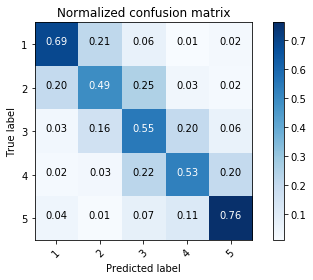

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


class_names = ["1", "2", "3", "4", "5"]

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, predicted_targets5)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# The confusion matrix

# the activation function at the output layer is softmax
# we did not choose it ourselves, but sklearn did